# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

This notebook explores Dandiset 000563, which contains extracellular electrophysiology and optogenetic data related to responses of visual neurons to white noise flicker visual stimuli.

**Note:** This notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results and independently verify any critical findings.

## Dandiset Overview

This Dandiset, "Allen Institute Openscope - Barcoding", contains neurophysiology data collected to study the temporal precision of visual neuron responses to white noise flicker stimuli. The experiment used the OpenScope Neuropixels passive viewing protocol. The researchers observed "barcode"-like patterns in neural responses to repeated white noise sequences and hypothesized that these could be used as identifiers for discrete cell types.

You can find more information about this Dandiset on the DANDI archive: [https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)

## Notebook Contents

This notebook will cover:

1. Loading the Dandiset and listing its assets.
2. Examining a selected NWB file and its structure.
3. Loading and visualizing Local Field Potential (LFP) data from the NWB file.
4. Summarizing key findings.

## Required Packages

The following packages are required to run this notebook:

* `dandi`
* `pynwb`
* `h5py`
* `remfile`
* `numpy`
* `matplotlib`
* `seaborn` (for styling)

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Loading the Dandiset and Assets

We will connect to the DANDI archive and retrieve the Dandiset information and list the available assets.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = list(dandiset.get_assets()) # Convert to list to easily access elements later
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


## Examining an NWB File

We will now examine one of the NWB files from the Dandiset to understand its structure and contents. We will focus on the file: `sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb`.

In [3]:
# Select the NWB file
nwb_file_path = "sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb"
nwb_asset = [asset for asset in assets if asset.path == nwb_file_path][0]
nwb_asset_id = nwb_asset.identifier
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"

print(f"Loading NWB file: {nwb_file_path}")
print(f"Asset ID: {nwb_asset_id}")
print(f"Download URL: {nwb_file_url}")

# Load the NWB file
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic NWB file metadata
print(f"\nSession Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")

Loading NWB file: sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb
Asset ID: 1f158fe0-f8ef-495e-b031-da25316a335c
Download URL: https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Session Description: LFP data and associated info for one probe
Identifier: 0
Session Start Time: 2023-08-16 00:00:00-07:00


### NWB File Structure Summary

The chosen NWB file (`sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb`) appears to contain Local Field Potential (LFP) data and associated metadata from one electrode probe. Based on the `nwb-file-info` output, here's a summary of key components:

```
NWBFile
├── session_description (str): LFP data and associated info for one probe
├── identifier (str): 0
├── session_start_time (datetime)
├── timestamps_reference_time (datetime)
├── file_create_date (list)
├── acquisition (LabelledDict)
│   └── probe_0_lfp (LFP)
│       └── electrical_series (LabelledDict)
│           └── probe_0_lfp_data (ElectricalSeries)
│               ├── resolution (float64)
│               ├── comments (str)
│               ├── description (str)
│               ├── conversion (float64)
│               ├── offset (float64)
│               ├── unit (str): volts
│               ├── data (Dataset): shape (10168076, 73); dtype float32
│               └── timestamps (Dataset): shape (10168076,); dtype float64
├── electrode_groups (LabelledDict)
│   └── probeA (EcephysElectrodeGroup)
│       ├── description (str): Ecephys Electrode Group
│       ├── location (str): See electrode locations
│       ├── has_lfp_data (bool)
│       ├── probe_id (int64)
│       ├── lfp_sampling_rate (float64): 625.0
│       └── device (EcephysProbe)
├── devices (LabelledDict)
│   └── probeA (EcephysProbe)
│       ├── description (str): Neuropixels 1.0 Probe
│       ├── manufacturer (str): imec
│       ├── sampling_rate (float64): 30000.0
│       └── probe_id (int64)
├── session_id (str)
├── institution (str)
├── stimulus_notes (str)
├── electrodes (DynamicTable): metadata about extracellular electrodes
│   ├── description (str)
│   ├── colnames (tuple)
│   ├── columns (tuple)
│   ├── id (ElementIdentifiers)
│   ├── location (VectorData): brain region
│   ├── group (VectorData): reference to ElectrodeGroup
│   ├── group_name (VectorData): name of ElectrodeGroup
│   ├── probe_vertical_position (VectorData): microns
│   ├── probe_horizontal_position (VectorData): microns
│   ├── probe_id (VectorData): unique id of device
│   ├── local_index (VectorData): local index on device
│   ├── valid_data (VectorData): usable data
│   ├── x, y, z (VectorData): coordinates
│   ├── imp (VectorData): impedance in ohms
│   └── filtering (VectorData): hardware filtering description
└── subject (EcephysSpecimen)
    ├── age (str)
    ├── age__reference (str)
    ├── genotype (str)
    ├── sex (str)
    ├── species (str)
    ├── subject_id (str)
    ├── strain (str)
    ├── specimen_name (str)
    └── age_in_days (float64)
```

This file primarily contains `ElectricalSeries` data under `acquisition/probe_0_lfp/electrical_series/probe_0_lfp_data`, which represents the LFP recordings. The `electrodes` table provides detailed information about each recording channel, including location and position on the probe.

You can explore this NWB file further on neurosift: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft)

## Loading and Visualizing LFP Data

We will now load a subset of the LFP data and visualize it. The `nwb-file-info` output showed that the LFP data is stored in `nwb.acquisition["probe_0_lfp_data"]`. We will also examine the associated electrode table to understand the channels.

In [4]:
# Get the ElectricalSeries for LFP data
lfp_electrical_series = nwb.acquisition["probe_0_lfp_data"]

# Get the electrodes information
electrodes_table = nwb.electrodes.to_dataframe()

print("Electrodes table head:")
print(electrodes_table.head())

Electrodes table head:
   location                                              group group_name  \
id                                                                          
2       APN  probeA abc.EcephysElectrodeGroup at 0x12815213...     probeA   
6       APN  probeA abc.EcephysElectrodeGroup at 0x12815213...     probeA   
10      APN  probeA abc.EcephysElectrodeGroup at 0x12815213...     probeA   
14      APN  probeA abc.EcephysElectrodeGroup at 0x12815213...     probeA   
18      APN  probeA abc.EcephysElectrodeGroup at 0x12815213...     probeA   

    probe_vertical_position  probe_horizontal_position  probe_id  local_index  \
id                                                                              
2                        40                         59         0            2   
6                        80                         59         0            6   
10                      120                         59         0           10   
14                      160     

The `electrodes_table` provides information about each channel, such as its location and position on the probe. We can see columns like `location`, `probe_vertical_position`, and `probe_horizontal_position`.

Now let's load a small portion of the LFP data and the corresponding timestamps. We will load the first 10000 time points for the first 5 channels.

In [5]:
# Define the time indices and channel indices to load
start_time_index = 0
end_time_index = 10000
start_channel_index = 0
end_channel_index = 5

# Load a subset of the LFP data
lfp_data_subset = lfp_electrical_series.data[start_time_index:end_time_index, start_channel_index:end_channel_index]

# Load the corresponding timestamps
timestamps_subset = lfp_electrical_series.timestamps[start_time_index:end_time_index]

print(f"\nShape of LFP data subset: {lfp_data_subset.shape}")
print(f"Shape of timestamps subset: {timestamps_subset.shape}")


Shape of LFP data subset: (10000, 5)
Shape of timestamps subset: (10000,)


We have loaded a small subset of the data to avoid excessive memory usage and network transfer. Now let's plot the LFP data for these few channels.

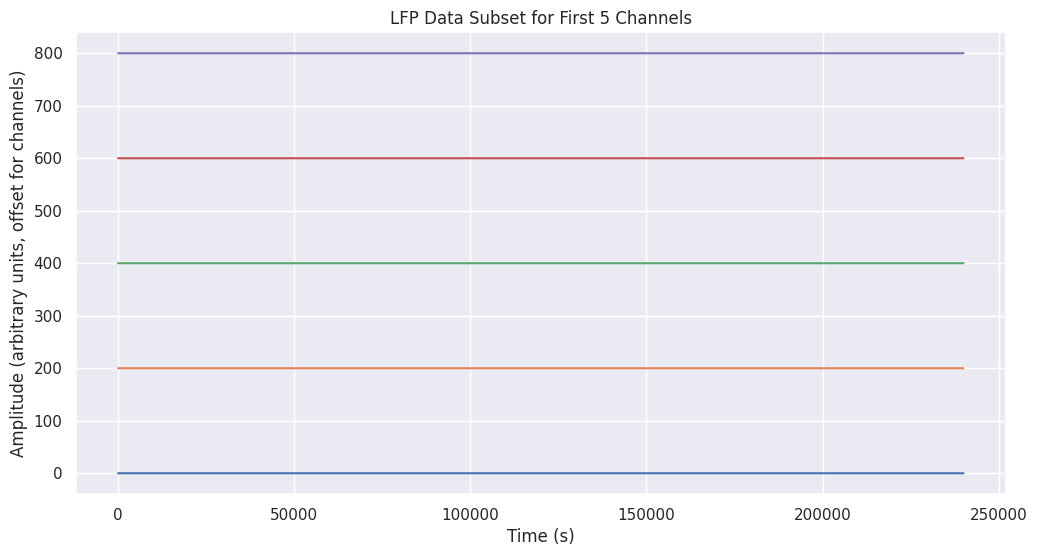

In [6]:
# Plot the LFP data subset
plt.figure(figsize=(12, 6))
for i in range(lfp_data_subset.shape[1]):
    plt.plot(timestamps_subset, lfp_data_subset[:, i] + i * 200) # Offset for visualization
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (arbitrary units, offset for channels)")
plt.title("LFP Data Subset for First 5 Channels")
plt.show()

The plot shows the LFP traces for the first 5 channels over a short time interval. We can see variability in the LFP signals across channels. The offset is applied for better visualization of individual traces.

## Summarizing the Contents and Potential Future Directions

This notebook provided a basic introduction to accessing and exploring Dandiset 000563. We loaded the Dandiset metadata and asset list, examined the structure of a selected NWB file containing LFP data, and visualized a subset of the LFP recordings.

The Dandiset also contains other NWB files, including those with `_ogen.nwb` suffix which likely contain optogenetic stimulation data. Further analysis could involve exploring these other files and investigating the relationship between optogenetic stimulation and neural responses.

The `electrodes` table contains valuable information about the recording channels, including their locations. This information could be used to analyze LFP activity in specific brain regions or across different depths of the probe.

Potential future directions for analysis include:

* Analyzing the full LFP dataset to identify oscillations or other patterns.
* Investigating neural responses to different visual stimuli presented in the experiment (as mentioned in the Dandiset description).
* Comparing LFP activity across different probes or animals.
* Integrating the LFP data with the optogenetic stimulation data to study the effects of stimulation.
* Exploring the "temporal barcode" hypothesis by analyzing spike timing patterns (if spike data is available in other NWB files).

This notebook serves as a starting point for exploring this rich dataset. Researchers can expand upon this code to perform more in-depth analysis based on their specific research questions.